In [1]:
import os
import pandas as pd
from pmdarima.arima import auto_arima
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir(r"D:\March 2024\PML\Datasets")

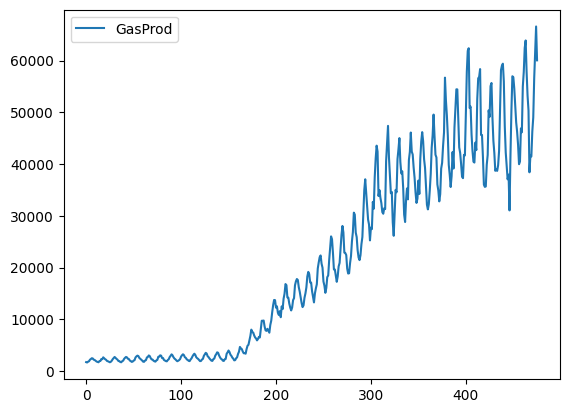

In [3]:
aus = pd.read_csv("AusGas.csv")
aus.plot()
plt.show()

In [4]:
y = aus['GasProd']
y_train = y[:-6]
y_test = y[-6:]

ARIMA

In [5]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8768.410, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8728.441, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8741.007, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8766.852, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8717.868, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8704.773, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8662.074, Time=0.52 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8638.897, Time=0.64 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8487.460, Time=3.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8515.916, Time=2.45 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8511.585, Time=2.37 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8397.399, Time=1.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8447.335, Time=1.38 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : 

In [6]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

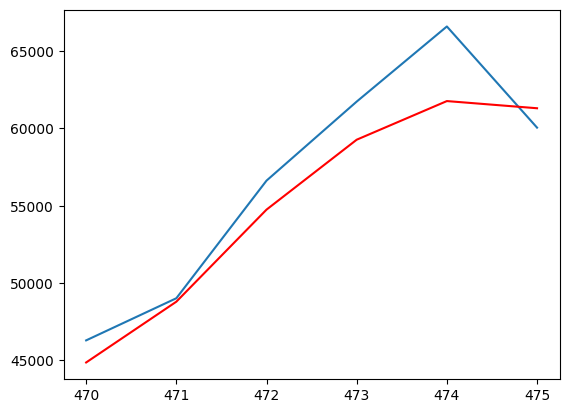

In [7]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

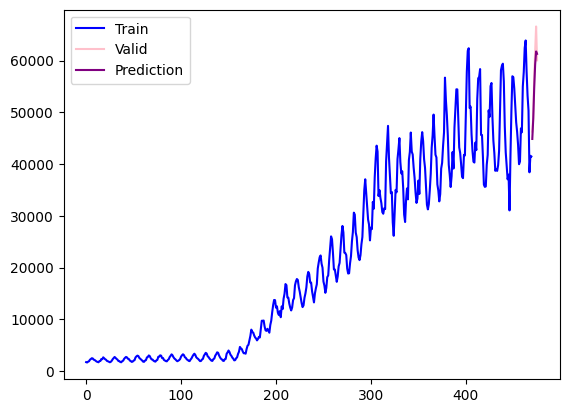

In [8]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [9]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 2469.043


SARIMA

In [10]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8768.410, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8398.887, Time=1.33 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8583.487, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8766.852, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8728.441, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8307.320, Time=2.01 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8583.004, Time=0.66 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8358.800, Time=5.55 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8354.006, Time=5.58 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8514.741, Time=2.19 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.44 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8358.584, Time=3.24 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [11]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

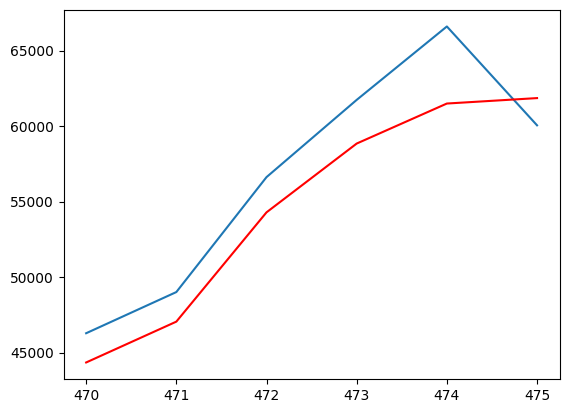

In [12]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

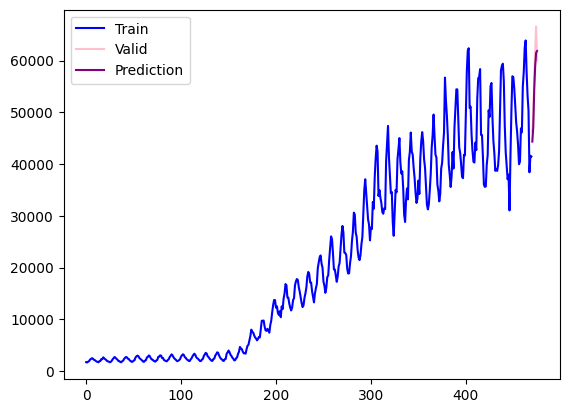

In [13]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [14]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 2906.224
